In [1]:
from google.colab import files
uploaded = files.upload()

Saving Bitcoin_Historical_Data.csv to Bitcoin_Historical_Data.csv


In [2]:
import pandas as pd

# Leer el archivo CSV
df = pd.read_csv('Bitcoin_Historical_Data.csv')

# Ver las primeras filas
df.head()


,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100


In [3]:
# Información básica del conjunto de datos
df.info()

# Resumen estadístico
df.describe()

# Verificar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3724 non-null   object 
 1   Adj Close  3724 non-null   float64
 2   Close      3724 non-null   float64
 3   High       3724 non-null   float64
 4   Low        3724 non-null   float64
 5   Open       3724 non-null   float64
 6   Volume     3724 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 203.8+ KB


,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [4]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)



In [5]:
# Eliminar duplicados
df.drop_duplicates(inplace=True)


In [7]:
# Ver las primeras filas del DataFrame
print(df.head())

# Información sobre el DataFrame: número de columnas, tipos de datos, valores no nulos
print(df.info())

# Resumen estadístico para columnas numéricas
print(df.describe())

# Verificar si hay valores faltantes
print(df.isnull().sum())

# Revisar si hay duplicados
print(f'Duplicados: {df.duplicated().sum()}')



                        Date   Adj Close       Close        High         Low  \
0  2014-09-17 00:00:00+00:00  457.334015  457.334015  468.174011  452.421997   
1  2014-09-18 00:00:00+00:00  424.440002  424.440002  456.859985  413.104004   
2  2014-09-19 00:00:00+00:00  394.795990  394.795990  427.834991  384.532013   
3  2014-09-20 00:00:00+00:00  408.903992  408.903992  423.295990  389.882996   
4  2014-09-21 00:00:00+00:00  398.821014  398.821014  412.425995  393.181000   

         Open    Volume  
0  465.864014  21056800  
1  456.859985  34483200  
2  424.102997  37919700  
3  394.673004  36863600  
4  408.084991  26580100  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3724 entries, 0 to 3723
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3724 non-null   object 
 1   Adj Close  3724 non-null   float64
 2   Close      3724 non-null   float64
 3   High       3724 non-null   float64
 4   Low        3

In [8]:
# Seleccionar columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not numeric_df.empty:
    print("Correlaciones entre variables numéricas:")
    print(numeric_df.corr())
else:
    print("No hay columnas numéricas en el conjunto de datos para calcular correlaciones.")


Correlaciones entre variables numéricas:
           Adj Close     Close      High       Low      Open    Volume
Adj Close   1.000000  1.000000  0.999599  0.999486  0.999025  0.654523
Close       1.000000  1.000000  0.999599  0.999486  0.999025  0.654523
High        0.999599  0.999599  1.000000  0.999183  0.999551  0.661160
Low         0.999486  0.999486  0.999183  1.000000  0.999324  0.645355
Open        0.999025  0.999025  0.999551  0.999324  1.000000  0.654951
Volume      0.654523  0.654523  0.661160  0.645355  0.654951  1.000000


In [9]:
# Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verificar si hay fechas inválidas
print(df['Date'].isnull().sum())



0


In [10]:
# Convertir la columna 'Date' al formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Verificar si hay fechas inválidas
print(df['Date'].isnull().sum())


0


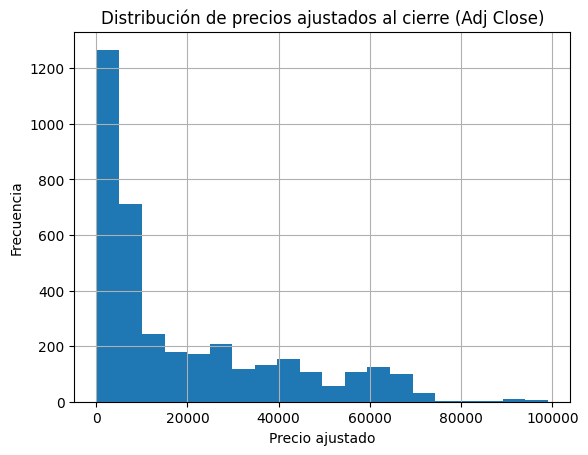

In [11]:
import matplotlib.pyplot as plt

# Histograma del precio ajustado al cierre
df['Adj Close'].hist(bins=20)
plt.title('Distribución de precios ajustados al cierre (Adj Close)')
plt.xlabel('Precio ajustado')
plt.ylabel('Frecuencia')
plt.show()


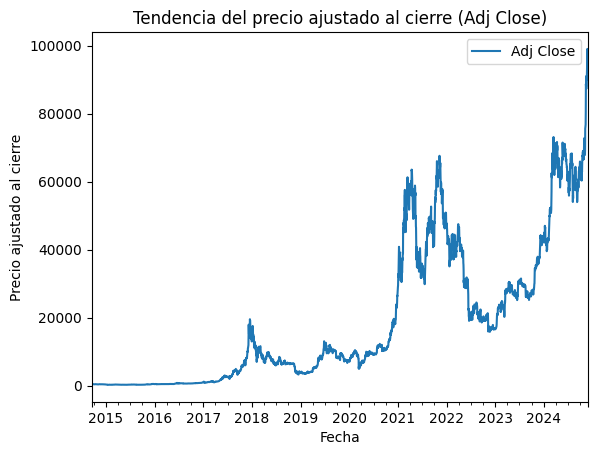

In [12]:
# Gráfico de línea de precio ajustado al cierre
df.plot(x='Date', y='Adj Close', kind='line')
plt.title('Tendencia del precio ajustado al cierre (Adj Close)')
plt.xlabel('Fecha')
plt.ylabel('Precio ajustado al cierre')
plt.show()


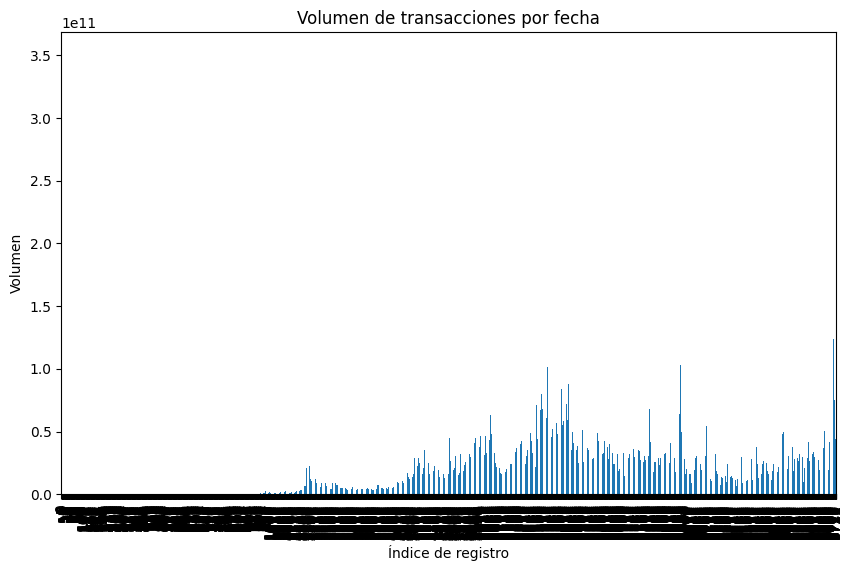

In [13]:
# Gráfico de barras para el volumen
df['Volume'].plot(kind='bar', figsize=(10, 6))
plt.title('Volumen de transacciones por fecha')
plt.xlabel('Índice de registro')
plt.ylabel('Volumen')
plt.show()


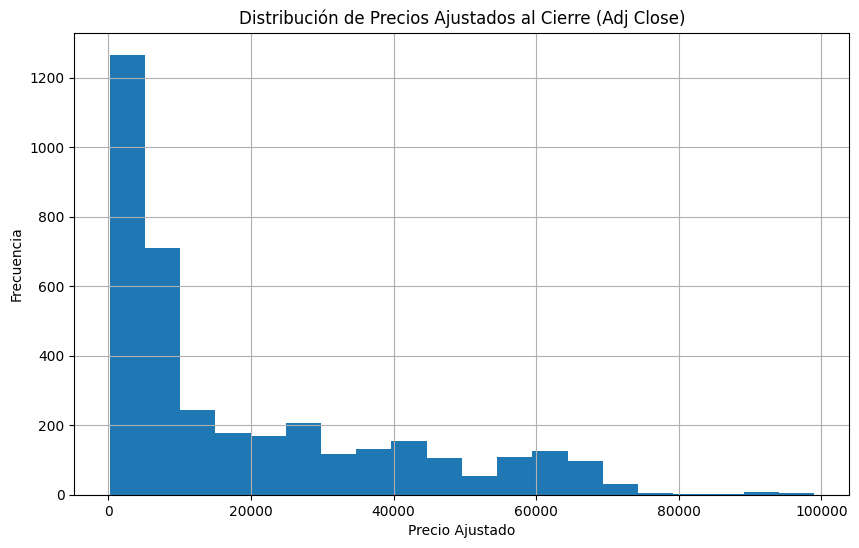

In [14]:
# Histograma del precio ajustado al cierre
df['Adj Close'].hist(bins=20, figsize=(10, 6))
plt.title('Distribución de Precios Ajustados al Cierre (Adj Close)')
plt.xlabel('Precio Ajustado')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

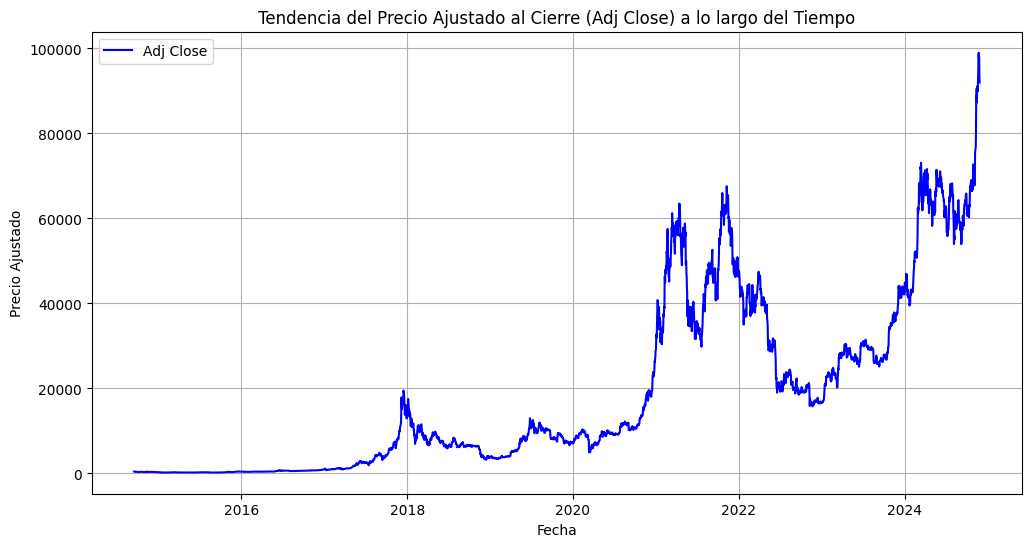

In [15]:
# Gráfico de líneas para el precio ajustado
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Adj Close'], label='Adj Close', color='blue')
plt.title('Tendencia del Precio Ajustado al Cierre (Adj Close) a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio Ajustado')
plt.legend()
plt.grid(True)
plt.show()


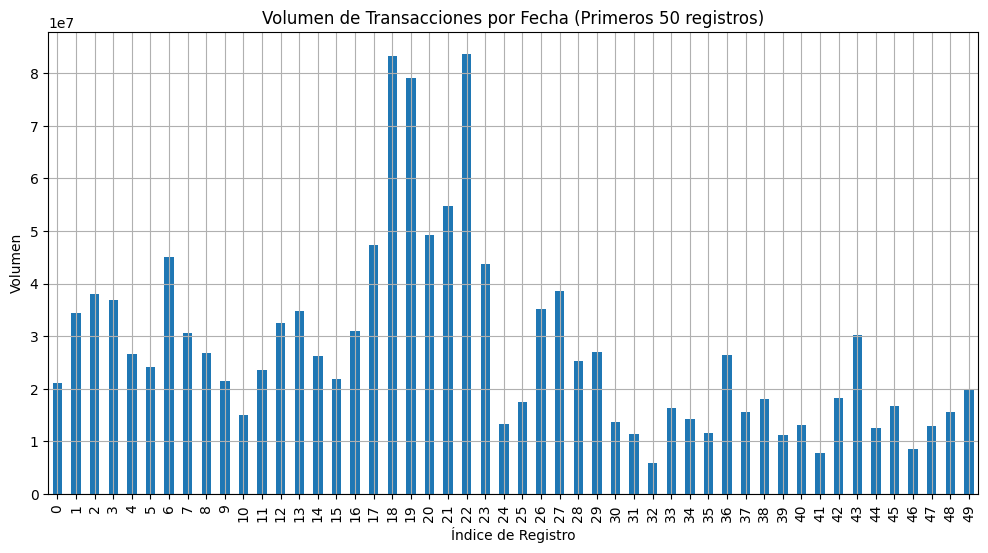

In [16]:
# Gráfico de barras para el volumen
df['Volume'][:50].plot(kind='bar', figsize=(12, 6))  # Usamos los primeros 50 registros para evitar saturación
plt.title('Volumen de Transacciones por Fecha (Primeros 50 registros)')
plt.xlabel('Índice de Registro')
plt.ylabel('Volumen')
plt.grid(True)
plt.show()


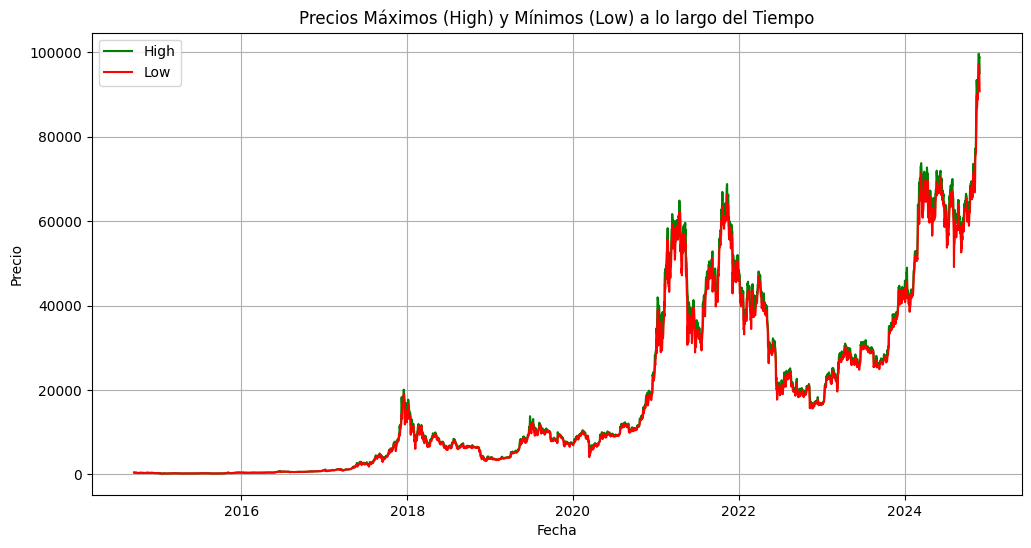

In [17]:
# Gráfico de línea para precios máximos y mínimos
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High', color='green')
plt.plot(df['Date'], df['Low'], label='Low', color='red')
plt.title('Precios Máximos (High) y Mínimos (Low) a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()
